In [1]:
# import libraries for analysis 
%matplotlib inline 
import numpy as np
import pandas as pd 
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns 
import folium
import json
from folium import plugins
from folium.plugins import MarkerCluster

import datetime 

In [2]:
#Read the CSV file

airbnb_nyc = pd.read_csv("Resource/AB_NYC_2019.csv")

#Examine the head of the CSV file, see some NaN values 
airbnb_nyc

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
#Check the shape 
airbnb_nyc.shape

(48895, 16)

In [4]:
#Examine the data type of every column 

airbnb_nyc.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Data Wrangling 

In [5]:
#Reexamine which columns have NaN values 

airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Name and host_name are irrelevant for our data analysis. However, last_review and reviews_per_month do jump out since it has a high number of NaN values. Last_review is a date so if there was not reviews for the listing- no date will exist. As for reviews_per_month, we can replace the NaN with 0.0 since 0 total reviews equates to 0.0 reviews_per_month. With this logic, we can start removing columns and replacing NaN values.

In [6]:
#Drop insignificant columns: id, host_name, last_review. 

# airbnb_nyc.drop(['id', 'host_name', 'last_review'], axis =1 , inplace= True)

#Check that columns have been removed
airbnb_nyc.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [7]:
#Fill reviews_per_month NaN values with 0 

airbnb_nyc.fillna({'reviews_per_month': 0}, inplace= True)

#Confirm that NaN values have been replaced
airbnb_nyc.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#Check for unique neighbourhood groups 
airbnb_nyc['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [9]:
airbnb_nyc.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

So far, we examined and cleaned the data. We also looked at the unique columns: neighbourhood groups, neighbourhoods, and room type for further analysis. 

# Data Exploration 

In [10]:
# Lets examine the top 10 hosts
super_hosts = airbnb_nyc['host_id'].value_counts()

top_10_hosts = super_hosts.head(10)

top_10_hosts 


219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [11]:
#setting figure size for future visualizations
sns.set(rc={'figure.figsize':(10,8)})


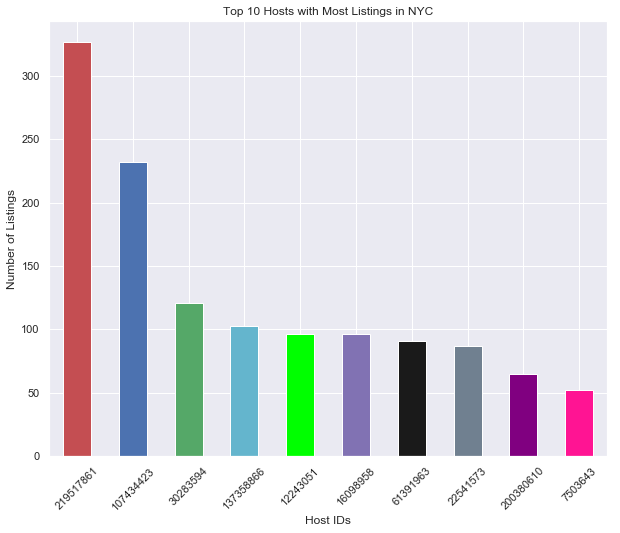

In [12]:
colors = ['r', 'b', 'g', 'c', 'lime', 'm', 'k', 'slategrey', 'purple', 'deeppink']

chart  = top_10_hosts.plot(kind='bar', rot=45, color=colors)
chart.set_title("Top 10 Hosts with Most Listings in NYC")
chart.set_xlabel("Host IDs")
chart.set_ylabel("Number of Listings")

plt.savefig('top10hostlistings.png')


The first host has 300+ listings. Third through tenth hosts have evenly distributed amount of listings.

In [13]:
#Lets examine the neighbourhood groups ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

#Brooklyn 
brooklyn = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Brooklyn']

#Creating a new column for called price for each neighbourhood group
price_brook = brooklyn[['price']]

#Manhattan
manh = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Manhattan']
price_manh = manh[['price']]

#Queens 
queens = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Queens']
price_queens = queens[['price']]

#Staten Island 
staten_i = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Staten Island']
price_staten_i = staten_i [['price']]

#Bronx 

bronx = airbnb_nyc.loc[airbnb_nyc['neighbourhood_group'] == 'Bronx']
price_bronx = bronx[['price']]


#Create a list to hold all the prices by neighbourhood groups 
neigh_price_list = [price_brook, price_manh, price_queens, price_staten_i, price_bronx]


In [72]:
# Get a count by neighbourhood groups aka boroughs 

borough_count = airbnb_nyc.groupby(['neighbourhood_group']).agg('count').reset_index()
borough_count

,neighbourhood_group,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Bronx,1091,1090,1091,1090,1091,1091,1091,1091,1091,1091,1091,876,1091,1091,1091
1,Brooklyn,20104,20098,20104,20095,20104,20104,20104,20104,20104,20104,20104,16447,20104,20104,20104
2,Manhattan,21661,21652,21661,21652,21661,21661,21661,21661,21661,21661,21661,16632,21661,21661,21661
3,Queens,5666,5666,5666,5664,5666,5666,5666,5666,5666,5666,5666,4574,5666,5666,5666
4,Staten Island,373,373,373,373,373,373,373,373,373,373,373,314,373,373,373


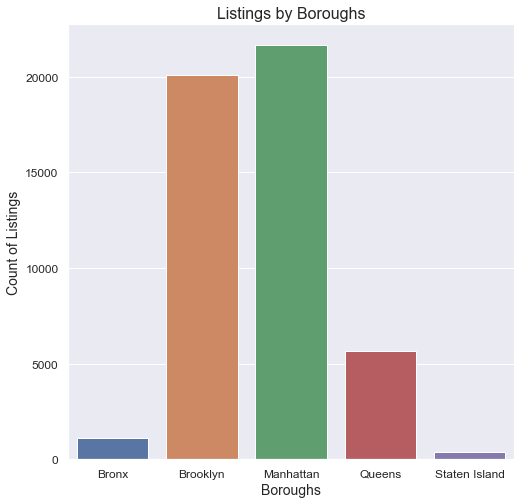

In [82]:
# Plot the count by borough 
fig, ax1 = plt.subplots(1,1, figsize=(8,8))

sns.barplot(x='neighbourhood_group', y='id', data=borough_count, ax=ax1)

ax1.set_title('Listings by Boroughs', fontsize=16)
ax1.set_xlabel('Boroughs', fontsize=14)
ax1.set_ylabel('Count of Listings', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

Most of Airbnb listings in New York are near Brooklyn and Manhattan.

Text(0.5, 1.0, 'Room Type Distribution by Boroughs')

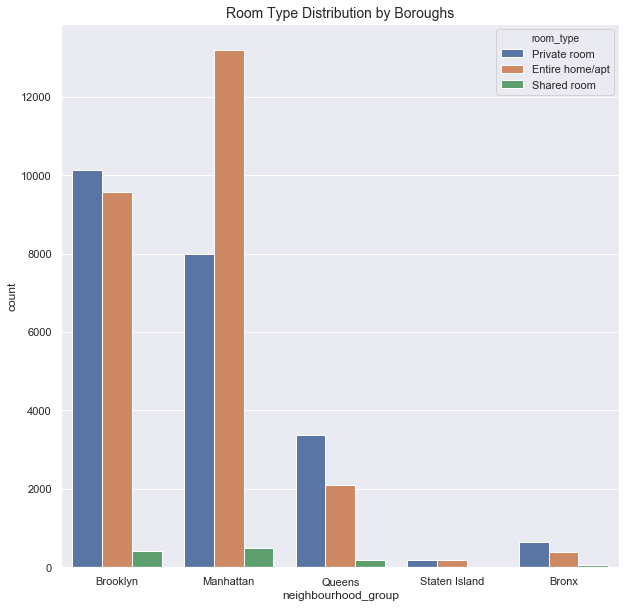

In [93]:
plt.figure(figsize=(10,10))
ax = sns.countplot(airbnb_nyc['neighbourhood_group'],hue=airbnb_nyc['room_type'])

ax.set_title('Room Type Distribution by Boroughs', fontsize=14)


The bar plot shows that Entire Home/Apartment are listed most near Manhattan while Private Rooms and Entire Home/Apartments near Brooklyn have similar count of listings.

## Comparions of prices by room types

In [96]:
#Brooklyn
sub_1=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Brooklyn') & (airbnb_nyc['room_type']=='Shared room')]
price_sub1=airbnb_nyc['price'].iloc[sub_1.index]# prices for Neighbourhood group having Brooklyn


#Bronx
sub_2=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Bronx') & (airbnb_nyc['room_type']=='Shared room')]
price_sub2=airbnb_nyc['price'].iloc[sub_2.index]# prices for Neighbourhood group having Bronx

#Staten Island
sub_3=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Staten Island') & (airbnb_nyc['room_type']=='Shared room')]
price_sub3=airbnb_nyc['price'].iloc[sub_3.index]# prices for Neighbourhood group having Staten Island

#Queens
sub_4=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Queens') & (airbnb_nyc['room_type']=='Shared room')]
price_sub4=airbnb_nyc['price'].iloc[sub_4.index]# prices for Neighbourhood group having Queens


#Manhattan
sub_5=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Manhattan') & (airbnb_nyc['room_type']=='Shared room')]
price_sub5=airbnb_nyc['price'].iloc[sub_5.index]# prices for Neighbourhood group having Manhattan


percentile_price_brooklyn=[]#percentile of prices for Shared rooms near brooklyn

percentile_price_Bronx=[]#percentile of prices for Shared rooms near Bronx

percentile_price_Staten_Island=[] #percentile of prices for Shared rooms near Staten Island

percentile_price_Queens=[] #percentile of prices for Shared rooms near Queens

percentile_price_Manhattan=[] #percentile of prices for Shared rooms near Manhattan


percentiles=[]# percentiles
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)
    

[Text(0, 0.5, 'Percentile Prices in USD ($)'), Text(0.5, 0, 'Percentiles')]

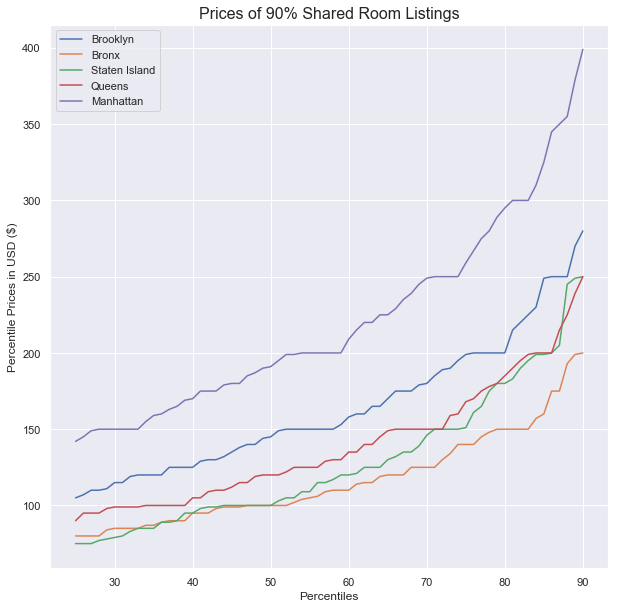

In [118]:
# for i in range(2):
plt.figure(figsize=(10,10))

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

plt.title('Prices of 90% Shared Room Listings',fontsize=16)
sns.set_style("darkgrid")
sd.set(xlabel='Percentiles', ylabel='Percentile Prices in USD ($)')

A shared room is cheapest in Brooklyn and Bronx. This graph shows that 90% of shared rooms cost nearly 80(USD) per night whereas Manhattan is the most expensive at nearly 150(USD) per night.

In [111]:
#Brooklyn
sub_1=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Brooklyn') & (airbnb_nyc['room_type']=='Private room')]
price_sub1=airbnb_nyc['price'].iloc[sub_1.index]# prices for Neighbourhood group having Brooklyn


#Bronx
sub_2=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Bronx') & (airbnb_nyc['room_type']=='Private room')]
price_sub2=airbnb_nyc['price'].iloc[sub_2.index]# prices for Neighbourhood group having Bronx

#Staten Island
sub_3=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Staten Island') & (airbnb_nyc['room_type']=='Private room')]
price_sub3=airbnb_nyc['price'].iloc[sub_3.index]# prices for Neighbourhood group having Staten Island

#Queens
sub_4=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Queens') & (airbnb_nyc['room_type']=='Private room')]
price_sub4=airbnb_nyc['price'].iloc[sub_4.index]# prices for Neighbourhood group having Queens


#Manhattan
sub_5=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Manhattan') & (airbnb_nyc['room_type']=='Private room')]
price_sub5=airbnb_nyc['price'].iloc[sub_5.index]# prices for Neighbourhood group having Manhattan


percentile_price_brooklyn=[]#percentile of prices for Private rooms near brooklyn

percentile_price_Bronx=[]#percentile of prices for Private rooms near Bronx

percentile_price_Staten_Island=[] #percentile of prices for Private rooms near Staten Island

percentile_price_Queens=[] #percentile of prices for Private rooms near Queens

percentile_price_Manhattan=[] #percentile of prices for Private rooms near Manhattan


percentiles=[]# percentiles
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)
    

[Text(0, 0.5, 'Percentile Prices in USD ($)'), Text(0.5, 0, 'Percentiles')]

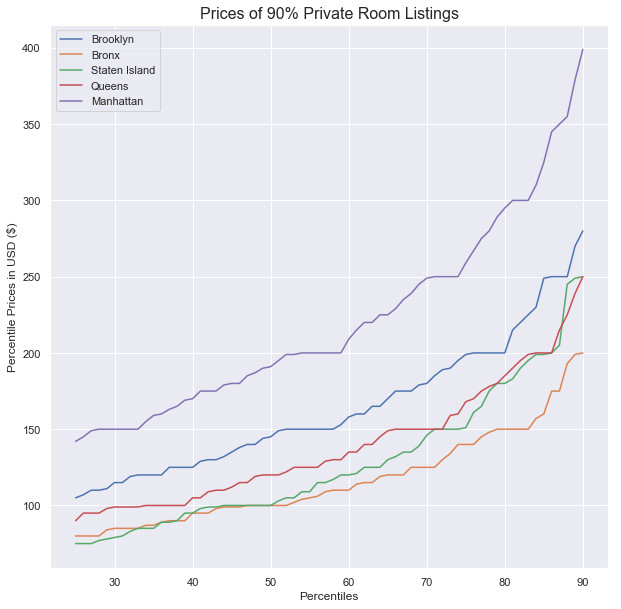

In [119]:

plt.figure(figsize=(10,10))

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

plt.title('Prices of 90% Private Room Listings',fontsize=16)
sns.set_style("darkgrid")
sd.set(xlabel='Percentiles', ylabel='Percentile Prices in USD ($)')

This chart shows that 90% of private rooms in Brooklyn, Bronx, Staten Island, Queens cost around 100 (USD) per night. On the contrary, private rooms in Manhattan cost nearly 180 (USD) per night

In [116]:
#Brooklyn
sub_1=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Brooklyn') & (airbnb_nyc['room_type']=='Entire home/apt')]
price_sub1=airbnb_nyc['price'].iloc[sub_1.index]# prices for Neighbourhood group having Brooklyn


#Bronx
sub_2=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Bronx') & (airbnb_nyc['room_type']=='Entire home/apt')]
price_sub2=airbnb_nyc['price'].iloc[sub_2.index]# prices for Neighbourhood group having Bronx

#Staten Island
sub_3=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Staten Island') & (airbnb_nyc['room_type']=='Entire home/apt')]
price_sub3=airbnb_nyc['price'].iloc[sub_3.index]# prices for Neighbourhood group having Staten Island

#Queens
sub_4=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Queens') & (airbnb_nyc['room_type']=='Entire home/apt')]
price_sub4=airbnb_nyc['price'].iloc[sub_4.index]# prices for Neighbourhood group having Queens


#Manhattan
sub_5=airbnb_nyc.loc[(airbnb_nyc['neighbourhood_group'] == 'Manhattan') & (airbnb_nyc['room_type']=='Entire home/apt')]
price_sub5=airbnb_nyc['price'].iloc[sub_5.index]# prices for Neighbourhood group having Manhattan


percentile_price_brooklyn=[]#percentile of prices for Private rooms near brooklyn

percentile_price_Bronx=[]#percentile of prices for Private rooms near Bronx

percentile_price_Staten_Island=[] #percentile of prices for Private rooms near Staten Island

percentile_price_Queens=[] #percentile of prices for Private rooms near Queens

percentile_price_Manhattan=[] #percentile of prices for Private rooms near Manhattan


percentiles=[]# percentiles
for i in range(25,91):
    percentile_price_brooklyn.append(int(price_sub1.quantile(i/100)))
    percentile_price_Bronx.append(int(price_sub2.quantile(i/100)))
    percentile_price_Staten_Island.append(int(price_sub3.quantile(i/100)))
    percentile_price_Queens.append(int(price_sub4.quantile(i/100)))
    percentile_price_Manhattan.append(int(price_sub5.quantile(i/100)))
    percentiles.append(i)
    

[Text(0, 0.5, 'Percentile Prices in USD ($)'), Text(0.5, 0, 'Percentiles')]

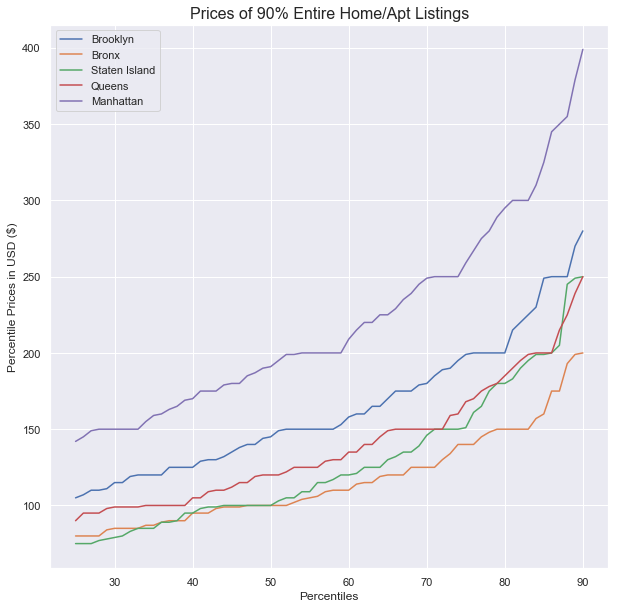

In [120]:

plt.figure(figsize=(10,10))

sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_brooklyn),label='Brooklyn')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Bronx),label='Bronx')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Staten_Island),label='Staten Island')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Queens),label='Queens')
sd=sns.lineplot(x=pd.Series(percentiles),y=pd.Series(percentile_price_Manhattan),label='Manhattan')

plt.title('Prices of 90% Entire Home/Apt Listings',fontsize=16)
sns.set_style("darkgrid")
sd.set(xlabel='Percentiles', ylabel='Percentile Prices in USD ($)')

This chart shows that entire home/apartments in Manhattan are most expensive, averaging nearly 400 (USD) per night. Staten Island, Queens, and Brooklyn lie between 250-275 (USD) per night. Bronx is the cheapest at 200 (USD) per night. 

In [14]:
#An empty list to collect the price distribution for each neighbourhood 

neigh_price_dis = []

neigh_groups = ['Brooklyn', 'Manhattan' , 'Queens', 'Staten Island', 'Bronx']

#Loop through to get stats for price distribution 

for x in neigh_price_list:
    prices = x.describe(percentiles = [0.25, 0.50, 0.75])
    prices = prices.iloc[3:]
    prices.reset_index(inplace=True)
    prices.rename(columns={'index': 'Statistics'}, inplace=True)
    neigh_price_dis.append(prices)
    
    
#Change the name of the price columns to reflect the correct neighbourhood groups 

neigh_price_dis[0].rename(columns={'price': neigh_groups[0]}, inplace=True)
neigh_price_dis[1].rename(columns={'price': neigh_groups[1]}, inplace=True)
neigh_price_dis[2].rename(columns={'price': neigh_groups[2]}, inplace=True)
neigh_price_dis[3].rename(columns={'price': neigh_groups[3]}, inplace=True)
neigh_price_dis[4].rename(columns={'price': neigh_groups[4]}, inplace=True)


#Create final dataframe for statistics 

stats_df = neigh_price_dis 

stats_df = [df.set_index('Statistics') for df in stats_df]

stats_df = stats_df[0].join(stats_df[1:])

stats_df 

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Statistics,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


The max seems extremely high; it's unlikely that one night rental would run 10,000 dollars on Airbnb. We will need to create a sub dataframe to get a better visualization. Also, some listings have a min of 0 which is highly unlikely since it will be listed as free.

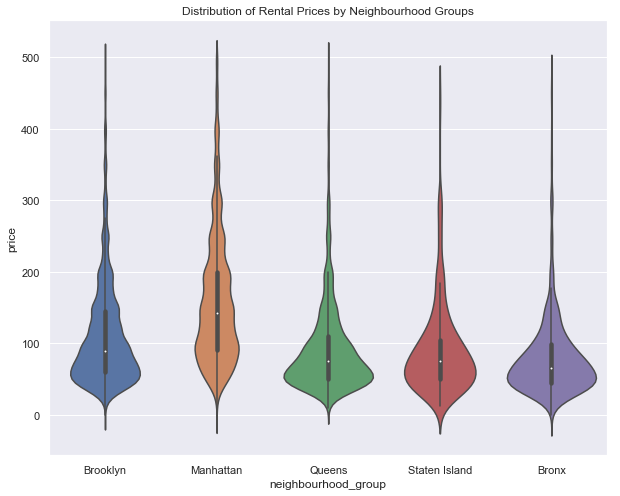

In [15]:
neigh_group_df = airbnb_nyc[airbnb_nyc.price < 500]

#using a violin plot to show density and allows deeper understanding of the distribution
violin_plot = sns.violinplot(x = 'neighbourhood_group', y='price', data=neigh_group_df)

violin_plot.set_title('Distribution of Rental Prices by Neighbourhood Groups')

plt.savefig('rentalpricedistribution.png')

Based on this violin chart, Manhattan has the widest distribution (wide range of prices) with $ 150 as average. Brooklyn has the second highest distribution. Queens and Staten Island have similar distributions and averages.  Bronx is the cheapest of them all. This violin chart is logical since Manhattan is known as one of the most expensive places in the world to live in whereas Bronx has a lower standard of living costs.  

### Create a new DF for neighborhoods by count of listings for map visualization

In [16]:
# Next, let's look at the unique neighborhoods again. We will just focus on the top 10 neighborhoods listed.

neighborhoods = airbnb_nyc['neighbourhood'].value_counts().sort_values(ascending=False)

#Capture top ten neighborhoods by lisitings 
top_10_neigh= neighborhoods[:10]
top_10_neigh


top_10_df = pd.DataFrame(top_10_neigh).reset_index()

ten_df = top_10_df.rename(columns = {'index':'Neighborhood',
                           'neighbourhood': 'Number of Listings'})

ten_df

,Neighborhood,Number of Listings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


In [17]:
# Load in file with lat, lon coordinates 

top_ten_zips = pd.read_csv('Resource/top10neighcoord.csv')
top_ten_zips

,Neighborhood,latitude,longitude
0,Williamsburg,40.7081,-73.9571
1,Bedford-Stuyvesant,40.6872,-73.9418
2,Harlem,40.8116,-73.9465
3,Bushwick,40.6958,-73.9171
4,Upper West Side,40.7870,-73.9754
5,Hell's Kitchen,40.7638,-73.9918
6,East Village,40.7265,-73.9815
7,Upper East Side,40.7736,-73.9566
8,Crown Heights,40.6694,-73.9422
9,Midtown,40.7549,-73.984


In [18]:
neigh_zip = ten_df.merge(top_ten_zips, on = 'Neighborhood')
neigh_zip 

,Neighborhood,Number of Listings,latitude,longitude
0,Williamsburg,3920,40.7081,-73.9571
1,Bedford-Stuyvesant,3714,40.6872,-73.9418
2,Harlem,2658,40.8116,-73.9465
3,Bushwick,2465,40.6958,-73.9171
4,Upper West Side,1971,40.7870,-73.9754
5,Hell's Kitchen,1958,40.7638,-73.9918
6,East Village,1853,40.7265,-73.9815
7,Upper East Side,1798,40.7736,-73.9566
8,Crown Heights,1564,40.6694,-73.9422
9,Midtown,1545,40.7549,-73.984


In [19]:
#Check data types 
neigh_zip.dtypes

Neighborhood           object
Number of Listings      int64
latitude              float64
longitude              object
dtype: object

In [20]:
# Convert longitude to float for mapping analysis 
neigh_zip['longitude'] = neigh_zip['longitude'].astype(float)

neigh_zip

,Neighborhood,Number of Listings,latitude,longitude
0,Williamsburg,3920,40.7081,-73.9571
1,Bedford-Stuyvesant,3714,40.6872,-73.9418
2,Harlem,2658,40.8116,-73.9465
3,Bushwick,2465,40.6958,-73.9171
4,Upper West Side,1971,40.7870,-73.9754
5,Hell's Kitchen,1958,40.7638,-73.9918
6,East Village,1853,40.7265,-73.9815
7,Upper East Side,1798,40.7736,-73.9566
8,Crown Heights,1564,40.6694,-73.9422
9,Midtown,1545,40.7549,-73.9840


In [21]:
#confirm that longitude data type converted to float
neigh_zip.dtypes

Neighborhood           object
Number of Listings      int64
latitude              float64
longitude             float64
dtype: object

### Create a new DF for 10 most reviewed listingd for map visualization

In [24]:
top_reviewed = airbnb_nyc.nlargest(10, 'number_of_reviews')

top_reviewed.drop(['host_name'], axis=1, inplace=True)

top_reviewed

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [25]:
top_reviewed['price'] = top_reviewed['price'].astype(str)

top_reviewed['number_of_reviews'] = top_reviewed['number_of_reviews'].astype(str)

top_reviewed

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
2031,903972,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,2019-06-21,7.75,3,293
2030,903947,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,2019-06-23,7.72,3,342
2015,891117,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,2019-06-15,7.57,3,339
13495,10101135,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,2019-07-06,6.95,1,179
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
4870,3474320,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,2019-07-01,8.14,1,269
471,166172,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,2019-07-07,6.70,1,0


In [26]:
top_reviewed.dtypes

id                                  int64
name                               object
host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                  object
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

# Geographical Visualizations

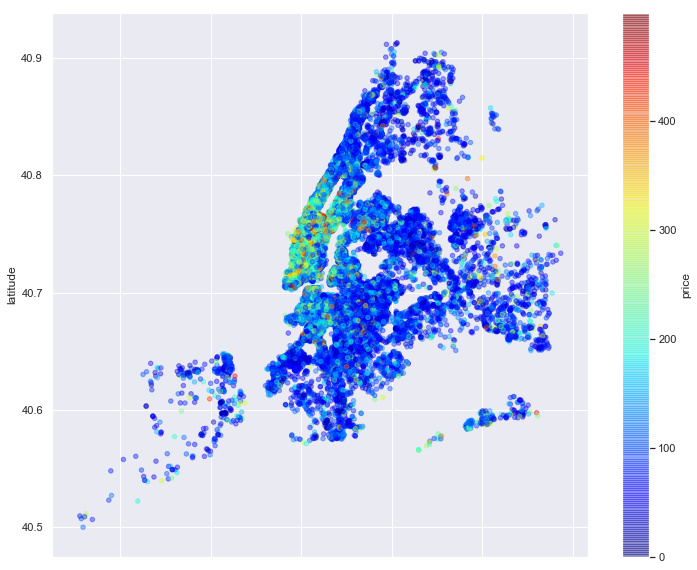

In [172]:
nyc_listing_borough = neigh_group_df.plot(kind='scatter', x='longitude', y='latitude', c='price', cmap=plt.get_cmap('jet'), alpha=0.4, figsize=(12,10))

nyc_listing_borough 

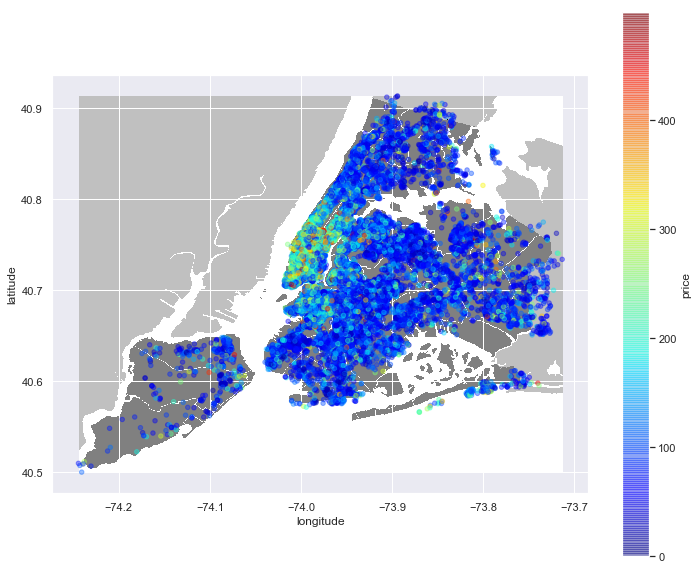

In [183]:
import urllib


image=urllib.request.urlopen('http://mapsof.net/uploads/static-maps/neighbourhoods_new_york_city_map.png')

nyc_boroughs = plt.imread(image)

#Scale the image based on the max and mins for longitude and latitude 

plt.imshow(nyc_boroughs, zorder=0, extent=[-74.244, -73.713, 40.500, 40.913])
ax=plt.gca()

neigh_group_df.plot(kind='scatter', x='longitude', y='latitude', c='price', ax=ax, cmap=plt.get_cmap('jet'),  alpha=0.4, zorder=4, figsize=(12,10))
plt.title('')
plt.show()

Using latitude and longitude points were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing. The prices are significantly higher in the Manhattan area as confirmed by the previous graphs on prices based on room type.

In [55]:
#Use folium to get a map 

def get_base_map(airbnb_nyc):
    return folium.Map(location=[airbnb_nyc['latitude'].mean(), airbnb_nyc['longitude'].mean()], zoom_start = 12)

base_map = get_base_map(airbnb_nyc)

base_map


In [68]:
# Create a Marker for each point in AirBnb NYC. Each point will get a pop-up 
mc = MarkerCluster()

for row in airbnb_nyc.itertuples():
    mc.add_child(folium.Marker(location=[row.latitude, row.longitude],
                               popup = [row.neighbourhood_group +', Neighbourhood: ' + row.neighbourhood]
                               ))
    
base_map.add_child(mc)
base_map.save("MarkerClusterMap2.html")

In [32]:
neigh_mean_price = airbnb_nyc.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)

top_10_neigh_mean = neigh_mean_price[:10]
top_10_neigh_mean

neighbourhood
Fort Wadsworth       800.000000
Woodrow              700.000000
Tribeca              490.638418
Sea Gate             487.857143
Riverdale            442.090909
Prince's Bay         409.500000
Battery Park City    367.557143
Flatiron District    341.925000
Randall Manor        336.000000
NoHo                 295.717949
Name: price, dtype: float64

In [33]:
top_neigh_mean_df = pd.DataFrame(top_10_neigh_mean).reset_index()

top_neigh_mean = top_neigh_mean_df.rename(columns={'price': 'Average Price/Night'})


top_neigh_mean['Average Price/Night'] = top_neigh_mean['Average Price/Night'].apply(lambda x: round(x))
top_neigh_mean

,neighbourhood,Average Price/Night
0,Fort Wadsworth,800
1,Woodrow,700
2,Tribeca,491
3,Sea Gate,488
4,Riverdale,442
5,Prince's Bay,410
6,Battery Park City,368
7,Flatiron District,342
8,Randall Manor,336
9,NoHo,296


In [34]:
# Cooridnates for the top ten most expensive neighbourhoods by average rental price 
lat = [40.6012, 40.5434, 40.7163, 40.5768, 40.8996, 40.5290, 40.7116, 40.7401, 40.6411, 40.7287]
lon = [-74.0579, -74.1976, -74.0086, -74.0080, -73.9088, -74.1976, -74.0158, -73.9903, -74.1034, -73.9926]

# Added columns to existing df 
top_neigh_mean['lat'] = lat 
top_neigh_mean['lon'] = lon 

# Change Price column to Str to include in the popup 
top_neigh_mean['Average Price/Night'] = top_neigh_mean['Average Price/Night'].astype(str)

#Check to verify int --> object 
top_neigh_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
neighbourhood          10 non-null object
Average Price/Night    10 non-null object
lat                    10 non-null float64
lon                    10 non-null float64
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


In [49]:
def get_base_map_2(airbnb_nyc):
    return folium.Map(location=[airbnb_nyc['latitude'].mean(), airbnb_nyc['longitude'].mean()], zoom_start = 12)

base_map_2 = get_base_map_2(airbnb_nyc)

base_map_2


In [67]:
for lat, lon, neigh, price in zip(top_neigh_mean['lat'],top_neigh_mean['lon'], top_neigh_mean['neighbourhood'], top_neigh_mean['Average Price/Night']):
    folium.Marker(location=[lat, lon], 
                 popup= ['Neighbourhood: ' + neigh + ', Average Price Per Night: ' + '$' + price ],
                 icon=folium.Icon(
                 icon_color = 'white', icon='home', color= 'lightgreen')).add_to(base_map_2)
    
base_map_2

In [51]:
def get_base_map_2(airbnb_nyc):
    return folium.Map(location=[airbnb_nyc['latitude'].mean(), airbnb_nyc['longitude'].mean()], zoom_start = 12)

base_map_3 = get_base_map_2(airbnb_nyc)

base_map_3


In [60]:
#Let's see where the top 10 most reviewed listings 

for latit, long, desc, price, numr, room  in zip(top_reviewed['latitude'], top_reviewed['longitude'], top_reviewed['name'], top_reviewed['price'],top_reviewed['number_of_reviews'], top_reviewed['room_type']):
     folium.Marker(location=[latit, long],popup = [desc, '\n $'+ price + ' per night,' + '\n' + numr + ' Reviews,' + '\n' + 'Room Type: ' + room ], 
                  icon= folium.Icon(color='red',
                  icon_color='white',icon = 'home')).add_to(base_map_3) 

base_map_3

In [53]:
# Lets add markers for Tourist spots 

t_tip = 'Click here to view!'

folium.Marker([40.779437, -73.963244],  popup= 'Metropolitan Museum of Art', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)
folium.Marker([40.75773, -73.985708],  popup= 'Times Square', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)
folium.Marker([40.785091, -73.968285],  popup= 'Central Park', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)
folium.Marker([40.574, -73.978],  popup= 'Coney Island', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)
folium.Marker([40.711667, -74.013611],  popup= 'September 11th Memorial', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)
folium.Marker([40.752813, -73.977215],  popup= 'Grand Central Terminal', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)
folium.Marker([40.759, -73.985],  popup= 'Theater District', tooltip=t_tip,icon= folium.Icon(color='blue', icon='info-sign')).add_to(base_map_3)



# Now let's add popular restaurants, data pulled from Eatery NY 

folium.Marker([40.7633, -73.9791],  popup= 'Quality Bistro - French ($$$)', tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7620, -73.9935],  popup= 'Kochi - Korean ($$)', tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7392, -73.9867],  popup= 'Verōnika - European ($$$)', tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7633, -73.9791],  popup= "Anton's - Italian ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7349, -73.9998],  popup= "The Banty Rooster - Southern/Comfort Food ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7272, -73.9839],  popup= "Mokyo - Tapa/Cocktail Bar ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7223, -73.0096],  popup= "Paisley - Indian ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)

#Restaurants in Queens 
folium.Marker([40.7450, -73.9536],  popup= "R40 - Argentinian ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7456, -73.9471],  popup= "Mina's NYC - Greek ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7631, -73.9281],  popup= "La Mian Lounge - Chinese ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7616, -73.9184],  popup= "Koyo - Japanese ($$$$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7002, -73.9075],  popup= "Cantina 33 - Peruvian ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7461, -73.8955],  popup= "Kusina Pinoy Bistro - Filipino/Comfort Food ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7472, -73.8899],  popup= "Birria-Landia - Mexican Food Truck ($)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)


#Restaurants in Queens
folium.Marker([40.7247, -73.9550],  popup= "Rules of Thirds - Japanese/Tapas ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7219, -73.9602],  popup= "Le Crocodile - French ($$$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7179, -73.9595],  popup= "Bolera - Vietnamese(Modern) ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7125, -73.9589],  popup= "Leo - Pizza ($)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7118, -73.9634],  popup= "Noods n’ Chill - Thai ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7118, -73.9431],  popup= "Pastrami Masters ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)
folium.Marker([40.7078, -73.9459],  popup= "Casa Ora - Venezuelan ($$)", tooltip=t_tip,icon= folium.Icon(color='green', icon='cutlery')).add_to(base_map_3)



base_map_3

This interactive map shows the most reviewed listings. I also included top attractions and restaurants in each of the bouroughs. The top restaurants were taken off Eater NY, a food news and dining guides for New York. This provides visitors/tourists a visual guide to find listings in proximity to popular attractions and/or restaurants. 

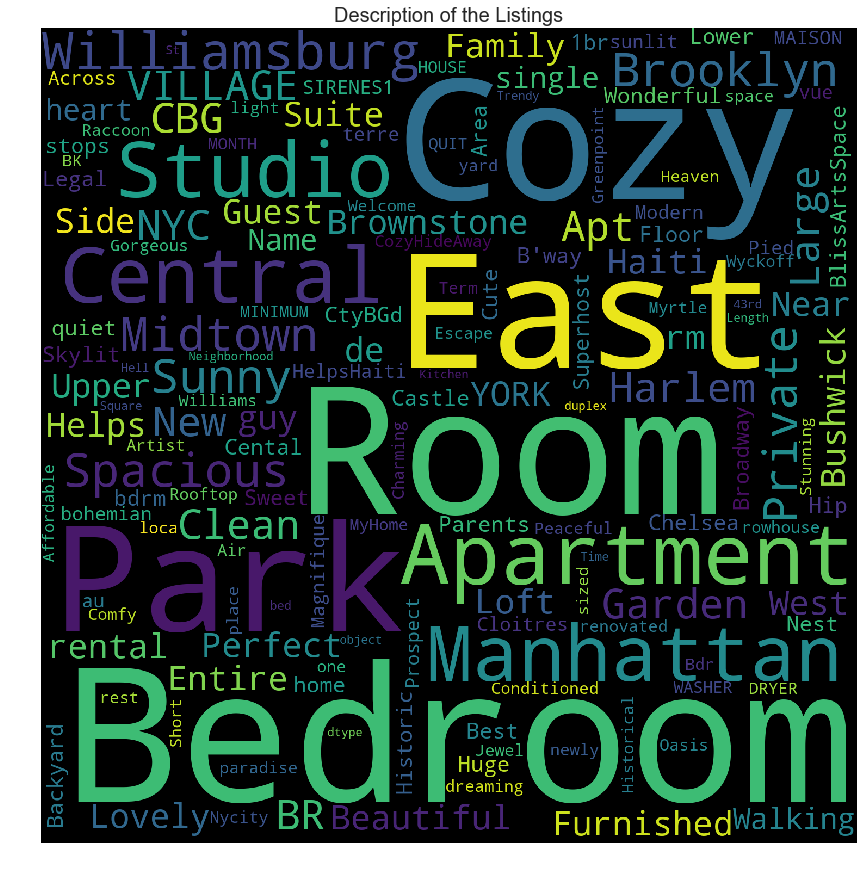

In [41]:
# description of the listings

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (15, 15)
plt.style.use('fast')

wc = WordCloud(background_color = 'black', width = 1500, height = 1500).generate(str(airbnb_nyc['name']))
plt.title('Description of the Listings', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()


Based on this WordCloud diagram, it shows that hosts are simply describing their lisitng in a short form with very specific terms for easier search by potential travelers. Word such as room, bedroom, cozy, apartment, studio, park, and private. Since Airbnb is used internationally, hosts need to use simple terms to describe the listing and area surrounding the it. 

# Takeaways

First, we have found hosts that take advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings (host ID 219517861). After that, we proceeded with analyzing boroughs and neighborhood listing densities and which areas were more popular. Next, we used of our latitude and longitude columns to create a geographical heatmap color-coded by the price of listings. Lastly, we came back to the name column with strings and analyzed existing trends on how listings are named to show provider (host) and consumer behaviors.